In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(X, columns=data['feature_names'])

In [6]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [7]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf = RandomForestRegressor(n_estimators=200).fit(X_train, y_train)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
y_pred = rf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

10.54006560629919
2.3564803149606273


In [14]:
print(f'Mean {y_train.mean()}')
print(f'Std: {y_train.std()}')

Mean 22.610026385224277
Std: 9.090500986124106


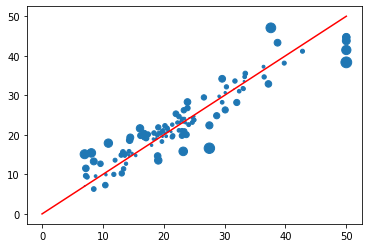

In [21]:
plt.scatter(y_test, y_pred,
            s=10*np.sqrt(np.power(y_pred - y_test, 2)))
plt.plot([0, 50], [0, 50], c='red')

(array([ 5.,  3.,  1.,  2.,  2.,  2.,  1.,  8.,  4.,  2.,  2.,  5.,  2.,
         7.,  8.,  9.,  5.,  3., 11.,  7.,  7.,  0.,  1.,  2.,  0.,  2.,
         4.,  1.,  2.,  2.,  5.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([ 7.  ,  7.86,  8.72,  9.58, 10.44, 11.3 , 12.16, 13.02, 13.88,
        14.74, 15.6 , 16.46, 17.32, 18.18, 19.04, 19.9 , 20.76, 21.62,
        22.48, 23.34, 24.2 , 25.06, 25.92, 26.78, 27.64, 28.5 , 29.36,
        30.22, 31.08, 31.94, 32.8 , 33.66, 34.52, 35.38, 36.24, 37.1 ,
        37.96, 38.82, 39.68, 40.54, 41.4 , 42.26, 43.12, 43.98, 44.84,
        45.7 , 46.56, 47.42, 48.28, 49.14, 50.  ]),
 <a list of 50 Patch objects>)

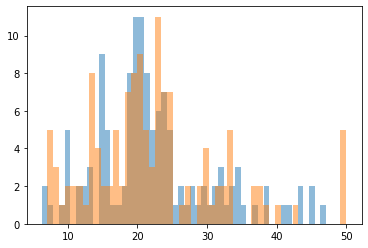

In [16]:
plt.hist(y_pred, bins=50, alpha=0.5)
plt.hist(y_test, bins=50, alpha=0.5)

### Ejercicio 1:
    - Elegir un modelo
    - Elegir dos hiperparámetros de ese modelo
    - Aplicar un Grid Search sobre esos dos hiperparámetros
    
*Se recomienda crear una función que tome como parámetros los hiperparámetros a usar y que entrene y valide el modelo.*

### Ejercicio 2

    - Elegir los mejores hiperparámetros 
    - Realizar el entrenamiento usando K-Fold (K=5)
*https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV*

### Ejercicio 3
    - Realizar la búsqueda de hiperparámetros con K-Fold (K=5) pero utilizando el método GridSearchCV
    - Después del entrenamiento, ver qué hay en el atributo "cv_results_" del objeto utilizado e interpretar los resultados
    
*https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV*

### Ejercicio 4:
    - Elegir tres modelos distintos, realizar el GridSearchCV con ellos
    - Comparar los resultados obtenidos por los disitntos modelos
    - Elegir un mejor modelo